# Baby Names with Pandas

In this exercise we analyze baby name popularity over the years using Python's popular pandas data science module.

In [1]:
import numpy as np
import matplotlib.pyplot as pp
pp.style.use('fivethirtyeight')
%matplotlib inline
import pandas as pd

## Part 1: Parsing data

After loading the required modules, let's take a look at the data files we're working with and load it into a data frame.

In [2]:
open('names/yob2016.txt','r').readlines()[:5]

['Emma,F,19471\n',
 'Olivia,F,19327\n',
 'Ava,F,16283\n',
 'Sophia,F,16112\n',
 'Isabella,F,14772\n']

In [3]:
names2016 = pd.read_csv('names/yob2016.txt', names=['name', 'sex', 'number'])

In [4]:
names2016.head()

,name,sex,number
0,Emma,F,19471
1,Olivia,F,19327
2,Ava,F,16283
3,Sophia,F,16112
4,Isabella,F,14772


We make a list of data frames each corresponding to a year and concatenate them into one large data frame that contains all the data we'll be working with.

In [5]:
names_all = []

for year in range(1880, 2017 + 1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year), names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [6]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
allyears.tail()

,name,sex,number,year
32464,Zykai,M,5,2017
32465,Zykeem,M,5,2017
32466,Zylin,M,5,2017
32467,Zylis,M,5,2017
32468,Zyrie,M,5,2017


To look up names by popularity, it'll be convenient to index our data by sex, name, and year and sort it by this index.

In [8]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [9]:
allyears_indexed.head()

number
sex name  year        
F   Aabha 2011       7
          2012       5
          2014       9
          2015       7
          2016       7

## Part 2: Some first plots of popularity

Let's also create a function that plots a given name belonging to a particular sex.

In [10]:
def plotname(sex, name):
    data = allyears_indexed.loc[sex, name]
    
    pp.plot(data.index, data.values)

Here are some male names...

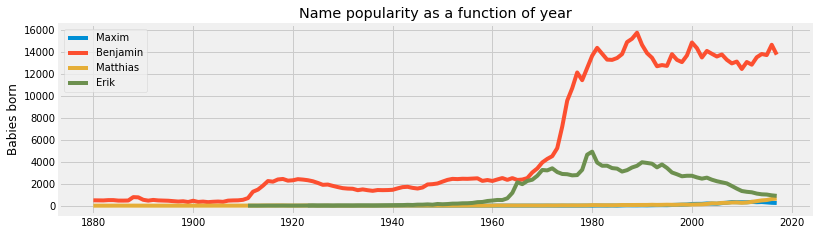

In [11]:
pp.figure(figsize = (12, 3.5))

names = ['Maxim', 'Benjamin', 'Matthias', 'Erik']

for name in names:
    plotname('M', name)

pp.legend(names)
pp.title('Name popularity as a function of year')
pp.ylabel('Babies born')
pp.show()

...and here some female ones.

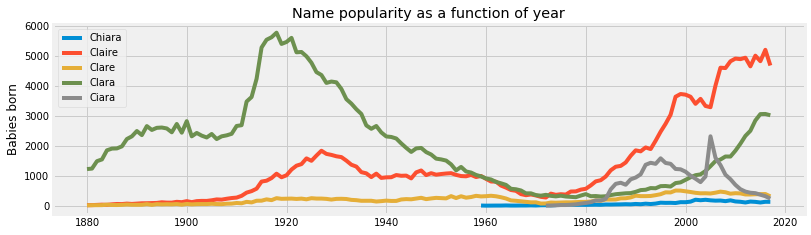

In [12]:
pp.figure(figsize = (12, 3.5))

names = ['Chiara', 'Claire', 'Clare', 'Clara', 'Ciara']

for name in names:
    plotname('F', name)

pp.legend(names)
pp.title('Name popularity as a function of year')
pp.ylabel('Babies born')
pp.show()

If instead we would like to produce a stack plot, i.e., a plot where the values of the different functions are summed on top of each other, we need to index our data by year and turn the names into columns. The pandas method `.unstack` does just that.

In [13]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level = 0, fill_value = 0)
variants.head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880      0     0     21  1226    15
1881      0     0     23  1242    20
1882      0     0     30  1490    21
1883      0     0     38  1548    22
1884      0     0     33  1852    38

`.unstack` sorts the new columns. To undo this behavior we call another method, `.reindex`.

In [14]:
variants = variants.reindex(columns = names, level = 1)
variants.head()

number                         
name Chiara Claire Clare Clara Ciara
year                                
1880      0     21    15  1226     0
1881      0     23    20  1242     0
1882      0     30    21  1490     0
1883      0     38    22  1548     0
1884      0     33    38  1852     0

Now we're ready to pass the new data frame's index and values to pyplot. If you [look into the pyplot manual](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.stackplot.html), you'll see that for a 1d array of dimension N passed as x-values, the 2d array passed for the y-values needs to be of dimension MxN. It follows that we need to transpose (`.T`) our data frame's values.

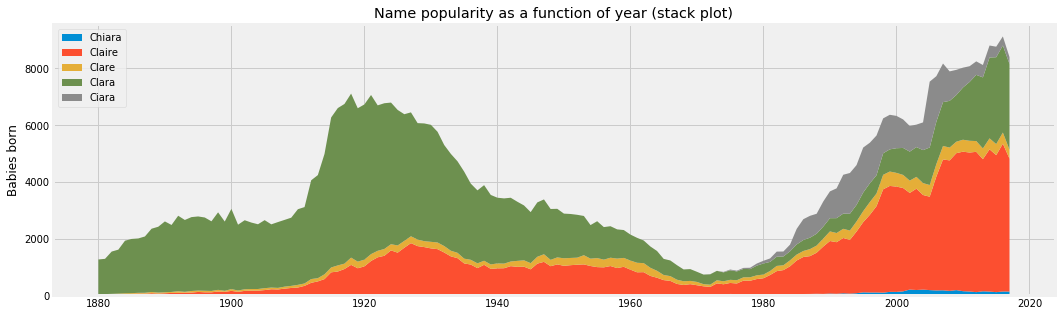

In [15]:
pp.figure(figsize = (16, 5))

pp.stackplot(variants.index, variants.values.T, labels = names)
pp.legend(loc = 'upper left')
pp.title('Name popularity as a function of year (stack plot)')
pp.ylabel('Babies born')
pp.show()

## Part 3: Yearly Top-Tens

The following function sorts a given year's data by popularity and keeps only the top ten names and ranking.

In [16]:
def topten(sex, year):
    simple = allyears_indexed.loc[sex, :, year].sort_values('number', ascending = False).reset_index()
    simple = simple.drop(['sex', 'year', 'number'], axis = 1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [17]:
topten('M', 2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


Another function, and we can display as many years' most popular names side-by-side each other as we like.

In [18]:
def toptens(sex, year0, year1):
    years = [topten(sex, year) for year in range(year0, year1 + 1)]
    
    return pd.concat(years, axis = 1)
    # could also use:
    # return years[0].join(years[1:])

In [19]:
toptens('M', 2000, 2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [20]:
toptens('F',1985,1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


Let's see which name persisted in the list of top tens over a given period the longest and plot those names.

In [21]:
toptens('F',1985,1995).stack().value_counts()

Elizabeth    11
Amanda       11
Sarah        11
Jessica      11
Ashley       11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Heather       3
Megan         3
Taylor        3
Lauren        2
Hannah        1
dtype: int64

In [22]:
popular = toptens('F',1985,1995).stack().value_counts().index[:5]

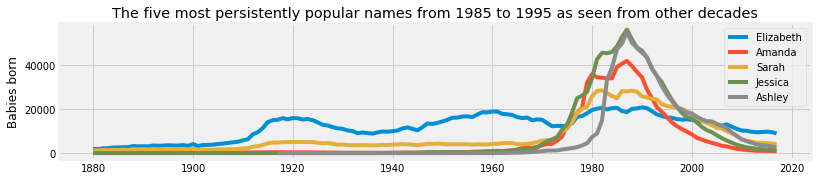

In [23]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)
    
pp.legend(popular)
pp.title('The five most persistently popular names from 1985 to 1995 as seen from other decades')
pp.ylabel('Babies born')
pp.show()

Indeed, out of these names, only "Elizabeth" is more than a fad.

## Part 4: Finding fads

To find fads more directly, we analyze the spikiness of each plot. In statistical terms, this can be measured by how much the sum of the squares of the annual name occurrences deviates from the square of their sum. The more localized the weight of a distribution is, the closer these two quantities will be to each other. For instance, if a name only occurs in a single year these two quantities are equal to each other.

We begin by finding the total count a name occurred since record keeping began.

In [24]:
totals = allyears.groupby(['sex', 'name'])['number'].sum()
totals.head()

sex  name     
F    Aabha        35
     Aabriella    32
     Aada          5
     Aaden         5
     Aadhira      77
Name: number, dtype: int64

Similarly, we use a function to obtain the sum of the squares and divide these two quantities to obtain a "spikiness ratio."

In [25]:
def sumsq(x):
    return sum(x ** 2)

In [26]:
spikiness = allyears.groupby(['sex', 'name'])['number'].agg(sumsq) / totals ** 2
spikiness.head()

sex  name     
F    Aabha        0.206531
     Aabriella    0.226562
     Aada         1.000000
     Aaden        1.000000
     Aadhira      0.209310
Name: number, dtype: float64

Let's only consider names that were at least somewhat common.

In [27]:
spiky_common = spikiness[totals > 5000].copy()
spiky_common.sort_values(ascending = False, inplace = True)
spiky_common.head(10)

sex  name     
F    Daleyza      0.215178
     Everly       0.198113
M    Kyrie        0.186085
     Shaquille    0.184900
     Jayceon      0.183607
     Thiago       0.151072
F    Paislee      0.142399
M    Legend       0.135969
     Iker         0.129404
F    Miley        0.127642
Name: number, dtype: float64

In [28]:
spiky_common.tail(5)

sex  name  
F    Rosa      0.008400
     Mollie    0.008251
M    Ike       0.008141
F    Delia     0.008091
     Louisa    0.008085
Name: number, dtype: float64

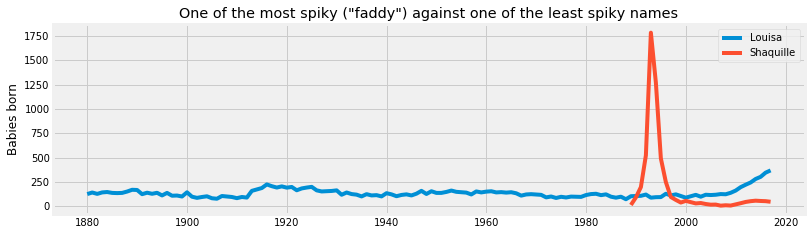

In [29]:
pp.figure(figsize=(12,3.5))

plotname('F','Louisa')
plotname('M','Shaquille')

pp.legend(['Louisa', 'Shaquille'])
pp.title('One of the most spiky ("faddy") against one of the least spiky names')
pp.ylabel('Babies born')
pp.show()

Let's plot the 10 most "faddy" names in history but exclude the current decade of record keeping since the spike of popularity for current names has not ended yet.

In [30]:
totals_recent = allyears[allyears['year'] > 2009].groupby(['sex', 'name'])['number'].sum()

In [31]:
spiky_common = spikiness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common.sort_values(ascending = False, inplace = True)
spiky_common.head(10)

sex  name     
M    Shaquille    0.184900
F    Katina       0.120167
     Krystle      0.099936
M    Devante      0.094226
F    Iesha        0.088406
     Shanice      0.088337
     Shaniqua     0.087601
     Khadijah     0.082212
     Dayanara     0.082173
     Marquita     0.080237
Name: number, dtype: float64

In [32]:
fads = spiky_common.head(10).index.values

We plot using a color jet to accommodate 10 different colors.

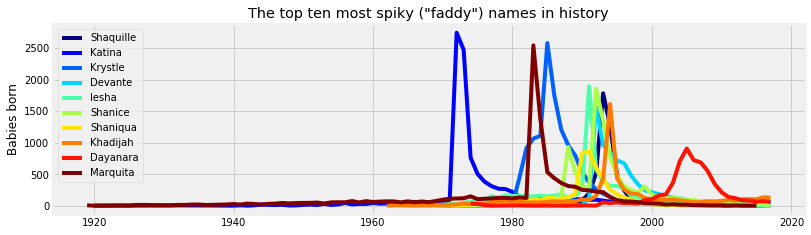

In [33]:
pp.figure(figsize=(12,3.5))

ax = pp.subplot(111)

jet = pp.cm.jet
colors = jet(np.linspace(0, 1, 10))
ax.set_prop_cycle(color=colors)

for sex,name in fads:
    data = allyears_indexed.loc[sex, name]
    ax.plot(data.index, data.values)

pp.legend([name for sex,name in fads],loc='upper left')
pp.title('The top ten most spiky ("faddy") names in history')
pp.ylabel('Babies born')
pp.show()

## Part 5: The most popular unisex names

To find the most popular unisex names, we begin by indexing our data by name and sex only and then unstack our data frame.

In [34]:
names_by_sex = allyears.groupby(['name', 'sex'])['number'].sum().unstack(fill_value = 0)
names_by_sex.head()

sex,F,M
name,,
Aaban,0,107
Aabha,35,0
Aabid,0,10
Aabir,0,5
Aabriella,32,0


We then add columns for total counts across sexes and a ratio between them.

In [35]:
names_ratio = names_by_sex.copy()
names_ratio['total'] = names_ratio.sum(axis = 1)
names_ratio['ratio'] = names_ratio['F'] / names_ratio['M']
names_ratio.head()

sex,F,M,total,ratio
name,,,,
Aaban,0,107,107,0.000000
Aabha,35,0,35,inf
Aabid,0,10,10,0.000000
Aabir,0,5,5,0.000000
Aabriella,32,0,32,inf


This way we can limit our search to ratios of F:M or M:F of no more than 4.

In [36]:
unisex_bool_mask = (names_ratio.loc[:, 'ratio'] > 0.25) & (names_ratio.loc[:, 'ratio'] < 4)

We apply this boolean mask to our data fram and sort the result.

In [37]:
unisex = names_ratio[unisex_bool_mask].copy()
unisex.sort_values('total', ascending = False, inplace = True)
unisex.head(10)

sex,F,M,total,ratio
name,,,,
Willie,146134,448636,594770,0.325730
Jordan,130144,369666,499810,0.352058
Taylor,317891,109848,427739,2.893917
Leslie,266447,112677,379124,2.364697
Jamie,267593,85292,352885,3.137375
Angel,94809,226653,321462,0.418300
Lee,62114,230780,292894,0.269148
Jessie,166994,110011,277005,1.517975
Marion,188245,71983,260228,2.615131


We'll plot these names both, as they compare to each other's male/female version, and how popular they were when combining their male/female counts.

To start with the latter, we need to slightly modify our initial data by summing equal names across genders.

In [38]:
unisex_topten = unisex.head(10).index

In [39]:
allyears_nosex = allyears.groupby(['name', 'year'])['number'].sum()
allyears_nosex.head(10)

name   year
Aaban  2007     5
       2009     6
       2010     9
       2011    11
       2012    11
       2013    14
       2014    16
       2015    15
       2016     9
       2017    11
Name: number, dtype: int64

We again plot using a color jet to accommodate 10 different colors.

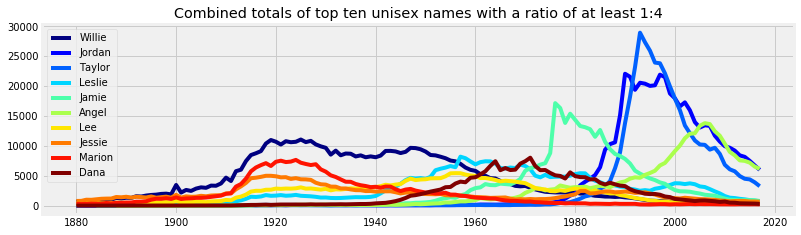

In [40]:
pp.figure(figsize = (12, 3.5))

ax = pp.subplot(111)

jet = pp.cm.jet
colors = jet(np.linspace(0, 1, 10))
ax.set_prop_cycle(color=colors)

for name in unisex_topten:
    data = allyears_nosex[name]
    ax.plot(data.index, data.values)

pp.legend([name for name in unisex_topten], loc = 'upper left')
pp.title('Combined totals of top ten unisex names with a ratio of at least 1:4')
pp.show()

Lastly, we plot these names comparing their male/female popularity side-by-side.

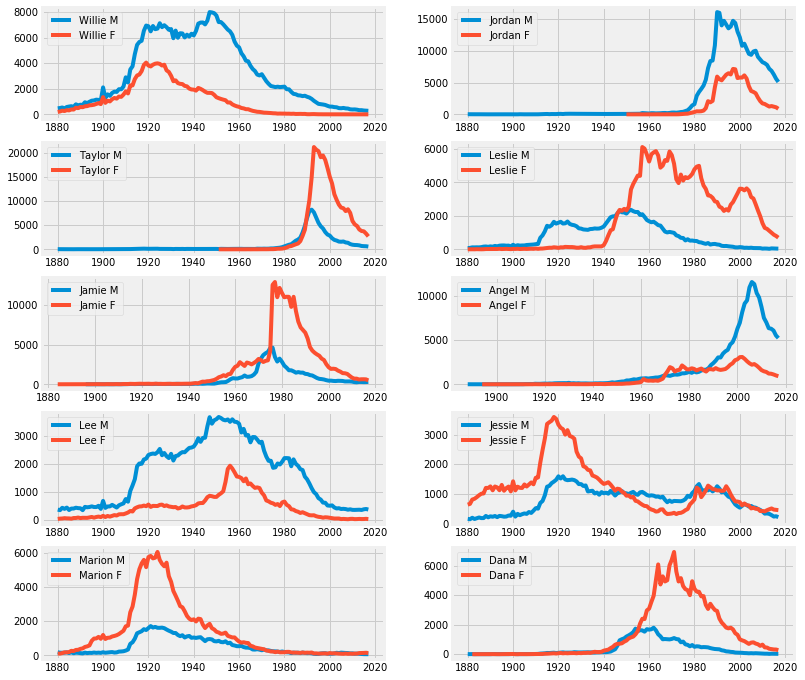

In [41]:
pp.figure(figsize = (12, 12))

for i,name in enumerate(unisex_topten):
    pp.subplot(5, 2, i + 1)
    
    plotname('M', name)
    plotname('F', name)
    
    pp.legend([name + ' M', name + ' F'],loc = 'upper left')